# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El objetivo principal es determinar cuál de las tarifas de prepago de la empresa genera más ingresos promedio. 
    Lo primero que haré será una exploración de datos para comprender la estructura y calidad de las tablas que me presentan, analizar tipo de datos, valores ausentes y/o inconsistentes.
    Transformar los datos según se requiera, calcular los usos mensuales de las diferentes variables, redondeando según las reglas de la empresa.
    Calcular los ingresos mensuales de cada usuario, considerando los límites y costos adicionalesde las tarifas.
    Comparar los ingresos promedio generados por cada tarifa.
    Realizar pruebas estadísticas para determinar si la diferencia de ingresos entre tarifas es significativa.

## Inicialización

In [107]:
# Cargar todas las librerías
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para gráficos
from scipy import stats  # Para realizar pruebas estadisticas
from datetime import datetime # Para manejar fechas y tiempos

## Cargar datos

In [108]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("C:/Users/Usuario/.jupyter/SPRINT_5/megaline_users.csv")
plans = pd.read_csv("C:/Users/Usuario/.jupyter/SPRINT_5/megaline_plans.csv")
messages = pd.read_csv("C:/Users/Usuario/.jupyter/SPRINT_5/megaline_messages.csv")
internet = pd.read_csv("C:/Users/Usuario/.jupyter/SPRINT_5/megaline_internet.csv")
calls = pd.read_csv("C:/Users/Usuario/.jupyter/SPRINT_5/megaline_calls.csv")

# Mostrar las primeras filas de cada DataFrame para verificar la carga
print("Users:")
display(users.head())

print("\nCalls:")
display(calls.head())

print("\nMessages:")
display(messages.head())

print("\nInternet:")
display(internet.head())

print("\nPlans:")
display(plans.head())



Users:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Calls:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



Messages:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Internet:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Plans:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [109]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [110]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Contiene la información de los planes de la empresa (surf y ultimate). Hay 8 columnas, no hay valores nulos.

## Corregir datos

No veo necesario corregir datos aún

## Enriquecer los datos

No veo factores adicionales para agregar, aun.

## Usuarios/as

In [111]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [112]:
# Imprime una muestra de datos para usuarios
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Users contiene 500 registros y 8 columnas con informacion posiblemente aleatoria de los clientes de la empresa. No hay valores nulos mas que en la columna "churn_date", lo que significa que había clientes aún estaban activos en el momento de la extracción de datos.
Podría generar un problema las columnas de fecha que están como object.

### Corregir los datos

Se convierten las columnas que contienen fechas a datetime

In [113]:
# Convertir reg_date y churn_date a formato datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enriquecer los datos

Creo la columna para extraer mes y año

In [114]:
# Crear la columna 'periodo' en la tabla users
users['periodo'] = users['reg_date'].dt.to_period('M')

## Llamadas

In [115]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [116]:
# Imprime una muestra de datos para las llamadas

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Calls tiene 4 columnas y no tiene valores nulos, tiene un columna con fechas (call_date) la cual podría cambiar a datetime.
Aqui voy a redondear la durcion de llamadas hacia arriba ya que la empresa cobra por minuto, también cambiaré el tipo de dato a entero.

### Corregir los datos

Cambio tipo de dato de columna call_date a datetime

In [117]:
# Convertir call_date a formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Redondear la duración de las llamadas al minuto más cercano
calls['duration'] = np.ceil(calls['duration']).astype(int)

display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enriquecer los datos

Creo la columna para extraer mes y año

In [118]:
# Crear la columna 'periodo' en la tabla calls
calls['periodo'] = calls['call_date'].dt.to_period('M')

## Mensajes

In [119]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [120]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Messages tiene 3 columnas, no tiene valores nulos, la columna message_date debe convertirse a datetime

### Corregir los datos

Se cambia el tipo de datos de message_date a datetime

In [121]:
# Convertir message_date a formato datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

display(messages.head())


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriquecer los datos

Creo la columna para extraer mes y año

In [122]:
# Crear la columna 'periodo' en la tabla messages
messages['periodo'] = messages['message_date'].dt.to_period('M')

## Internet

In [123]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [124]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


internet tiene 4 columnas y no tiene valores nulos.
La columna session_date debe convertirse a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [125]:
# Convertir session_date a formato datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

display(internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enriquecer los datos

Creo la columna para extraer mes y año

In [126]:
# Crear la columna 'periodo' en la tabla internet
internet['periodo'] = internet['session_date'].dt.to_period('M')

## Estudiar las condiciones de las tarifas

Surf

    Pago mensual: $20.
    500 minutos al mes, 50 SMS y 15 GB de datos.
    Si se exceden los límites del paquete:
        1 minuto: 3 centavos.
        1 SMS: 3 centavos.
        1 GB de datos: $10.

Ultimate

    Pago mensual: $70.
    3000 minutos al mes, 1000 SMS y 30 GB de datos.
    Si se exceden los límites del paquete:
        1 minuto: 1 centavo.
        1 SMS: 1 centavo.
        1 GB de datos: $7.

In [127]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Usando .groupby() calcularé el número de llamadas por user_id y periodo

In [128]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Calcular el número de llamadas por usuario y mes
calls_per_user_month = calls.groupby(['user_id', 'periodo'])['id'].count().reset_index()
calls_per_user_month.rename(columns={'id': 'calls_made'}, inplace=True)

# Mostrar las primeras filas
display(calls_per_user_month.head())



,user_id,periodo,calls_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [129]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Calcular la cantidad total de minutos usados por usuario y mes
minutes_per_user_month = calls.groupby(['user_id', 'periodo'])['duration'].sum().reset_index()
minutes_per_user_month.rename(columns={'duration': 'minutes_used'}, inplace=True)

# Mostrar las primeras filas
display(minutes_per_user_month.head())



,user_id,periodo,minutes_used
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [130]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Contar el número de mensajes enviados por usuario y mes
messages_per_user_month = messages.groupby(['user_id', 'periodo'])['id'].count().reset_index()
messages_per_user_month.rename(columns={'id': 'messages_sent'}, inplace=True)

# Mostrar las primeras filas
display(messages_per_user_month.head())


,user_id,periodo,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [131]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Sumar el volumen de datos usados por usuario y mes
internet_per_user_month = internet.groupby(['user_id', 'periodo'])['mb_used'].sum().reset_index()
internet_per_user_month.rename(columns={'mb_used': 'mb_used_total'}, inplace=True)

# Mostrar las primeras filas
display(internet_per_user_month.head())


,user_id,periodo,mb_used_total
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Usando .merge() fusionaré los datos de las llamadas, minutos, mensajes, e internet, tomando como base las columnas user_id y periodo

In [132]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_activity = calls_per_user_month.merge(minutes_per_user_month, on=['user_id', 'periodo'], how='outer')
user_activity = user_activity.merge(messages_per_user_month, on=['user_id', 'periodo'], how='outer')
user_activity = user_activity.merge(internet_per_user_month, on=['user_id', 'periodo'], how='outer')

# Rellenar valores NaN con 0 (si un usuario no usó llamadas, mensajes o internet en un mes)
user_activity.fillna(0, inplace=True)

# Convertir a enteros las columnas de cantidad de llamadas, minutos y mensajes
user_activity['calls_made'] = user_activity['calls_made'].astype(int)
user_activity['minutes_used'] = user_activity['minutes_used'].astype(int)
user_activity['messages_sent'] = user_activity['messages_sent'].astype(int)

# Convertir MB a GB redondeando hacia arriba (política de Megaline)
user_activity['gb_used'] = np.ceil(user_activity['mb_used_total'] / 1024).astype(int)
user_activity.drop(columns=['mb_used_total'], inplace=True)  # Eliminar la columna en MB

# Mostrar las primeras filas del resultado
display(user_activity.head())



,user_id,periodo,calls_made,minutes_used,messages_sent,gb_used
0,1000,2018-12,16,124,11,2
1,1001,2018-08,27,182,30,7
2,1001,2018-09,49,315,44,14
3,1001,2018-10,65,393,53,22
4,1001,2018-11,64,426,36,19


In [133]:
# Añade la información de la tarifa
# Fusionar con la tabla de usuarios para obtener el plan de cada usuario
user_activity = user_activity.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Fusionar con la tabla de planes para obtener la información de la tarifa
user_activity = user_activity.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Eliminar la columna duplicada 'plan_name'
user_activity.drop(columns=['plan_name'], inplace=True)

# Mostrar las primeras filas con la información de la tarifa incluida
display(user_activity.head())



,user_id,periodo,calls_made,minutes_used,messages_sent,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,16,124,11,2,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08,27,182,30,7,surf,50,15360,500,20,10,0.03,0.03
2,1001,2018-09,49,315,44,14,surf,50,15360,500,20,10,0.03,0.03
3,1001,2018-10,65,393,53,22,surf,50,15360,500,20,10,0.03,0.03
4,1001,2018-11,64,426,36,19,surf,50,15360,500,20,10,0.03,0.03


Cada usuario paga una tarifa fija mensual, pero si excede los límites de su plan, paga cargos adicionales:

Tarifa fija: usd_monthly_pay (costo base del plan).
Minutos adicionales: Si minutes_used supera minutes_included, se cobra usd_per_minute por cada minuto extra.
Mensajes adicionales: Si messages_sent supera messages_included, se cobra usd_per_message por cada mensaje extra.
Datos adicionales: Si gb_used supera mb_per_month_included / 1024 (límite en GB), se cobra usd_per_gb por cada GB extra.

In [134]:
# Calcular el exceso de uso en minutos, mensajes y datos
user_activity['extra_minutes'] = np.maximum(user_activity['minutes_used'] - user_activity['minutes_included'], 0)
user_activity['extra_messages'] = np.maximum(user_activity['messages_sent'] - user_activity['messages_included'], 0)
user_activity['extra_gb'] = np.maximum(user_activity['gb_used'] - (user_activity['mb_per_month_included'] / 1024), 0).astype(int)

# Calcular los costos adicionales
user_activity['extra_minutes_cost'] = user_activity['extra_minutes'] * user_activity['usd_per_minute']
user_activity['extra_messages_cost'] = user_activity['extra_messages'] * user_activity['usd_per_message']
user_activity['extra_gb_cost'] = user_activity['extra_gb'] * user_activity['usd_per_gb']

# Calcular el ingreso total mensual por usuario
user_activity['total_revenue'] = (
    user_activity['usd_monthly_pay'] +
    user_activity['extra_minutes_cost'] + 
    user_activity['extra_messages_cost'] + 
    user_activity['extra_gb_cost']
)

# Resultados
display(user_activity.head())



,user_id,periodo,calls_made,minutes_used,messages_sent,gb_used,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_gb,extra_minutes_cost,extra_messages_cost,extra_gb_cost,total_revenue
0,1000,2018-12,16,124,11,2,ultimate,1000,30720,3000,...,7,0.01,0.01,0,0,0,0.0,0.00,0,70.00
1,1001,2018-08,27,182,30,7,surf,50,15360,500,...,10,0.03,0.03,0,0,0,0.0,0.00,0,20.00
2,1001,2018-09,49,315,44,14,surf,50,15360,500,...,10,0.03,0.03,0,0,0,0.0,0.00,0,20.00
3,1001,2018-10,65,393,53,22,surf,50,15360,500,...,10,0.03,0.03,0,3,7,0.0,0.09,70,90.09
4,1001,2018-11,64,426,36,19,surf,50,15360,500,...,10,0.03,0.03,0,0,4,0.0,0.00,40,60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

,periodo,plan,minutes_used
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,surf,NaN
freq,1,12,NaN
mean,NaN,NaN,384.469691
std,NaN,NaN,76.535567
min,NaN,NaN,203.000000
25%,NaN,NaN,346.155000
50%,NaN,NaN,412.168958
75%,NaN,NaN,430.122211


,periodo,plan,minutes_used
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,ultimate,NaN
freq,1,12,NaN
mean,NaN,NaN,387.999742
std,NaN,NaN,77.266064
min,NaN,NaN,193.500000
25%,NaN,NaN,362.432371
50%,NaN,NaN,413.839000
75%,NaN,NaN,439.432934


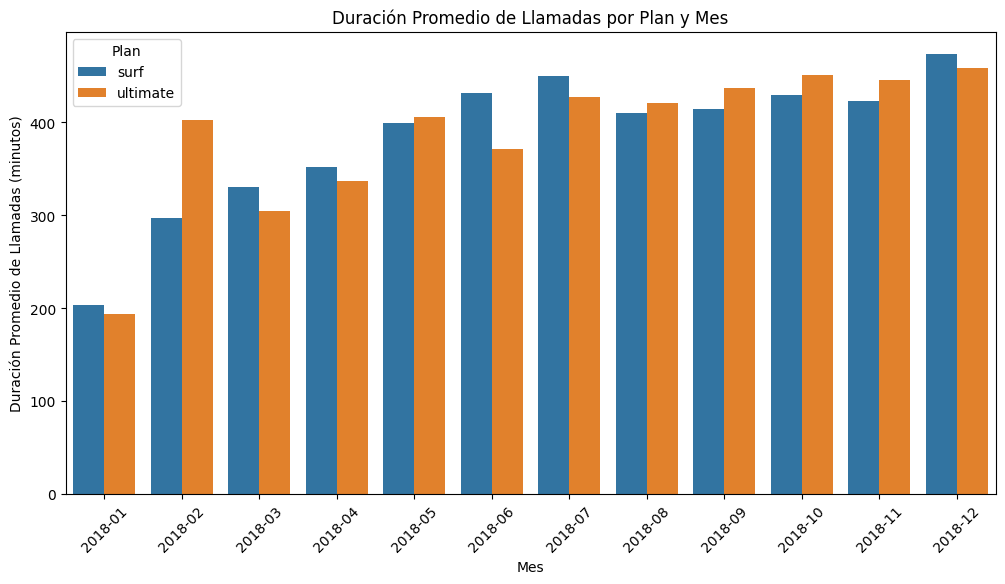

In [135]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = user_activity.groupby(['periodo', 'plan'])['minutes_used'].mean().reset_index()
display(avg_call_duration[avg_call_duration['plan']=='surf'].describe(include='all'))
display(avg_call_duration[avg_call_duration['plan']=='ultimate'].describe(include='all'))
# Graficar
plt.figure(figsize=(12,6))
sns.barplot(data=avg_call_duration, x='periodo', y='minutes_used', hue='plan')

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Duración Promedio de Llamadas (minutos)")
plt.title("Duración Promedio de Llamadas por Plan y Mes")
plt.xticks(rotation=45)
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()



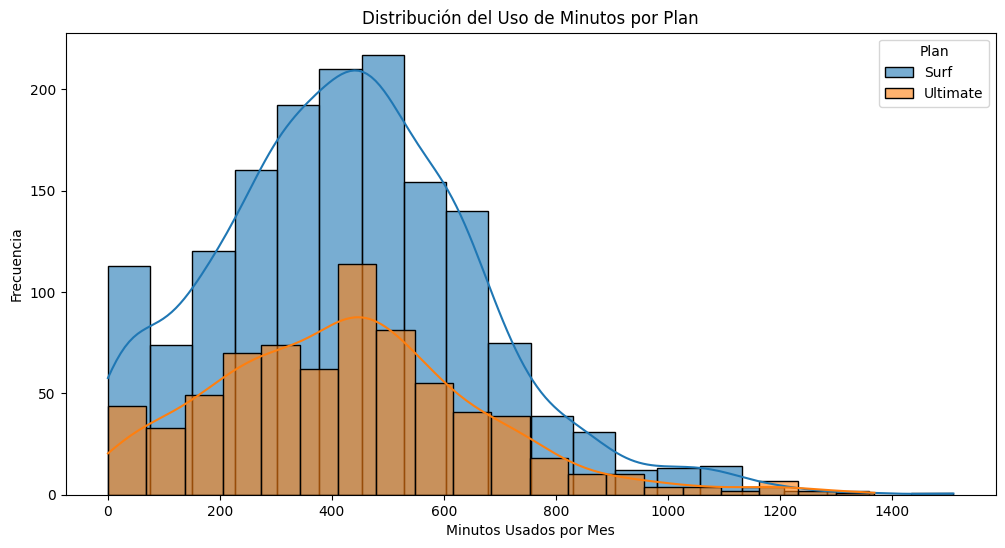

In [136]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Configurar el gráfico
plt.figure(figsize=(12,6))

# Graficar histogramas para cada plan
sns.histplot(user_activity[user_activity['plan'] == 'surf']['minutes_used'], bins=20, kde=True, label="Surf", alpha=0.6)
sns.histplot(user_activity[user_activity['plan'] == 'ultimate']['minutes_used'], bins=20, kde=True, label="Ultimate", alpha=0.6)

# Etiquetas
plt.xlabel("Minutos Usados por Mes")
plt.ylabel("Frecuencia")
plt.title("Distribución del Uso de Minutos por Plan")
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [137]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_stats = user_activity.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()

# Mostrar estadísticas
display(call_stats)



,plan,mean,var
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


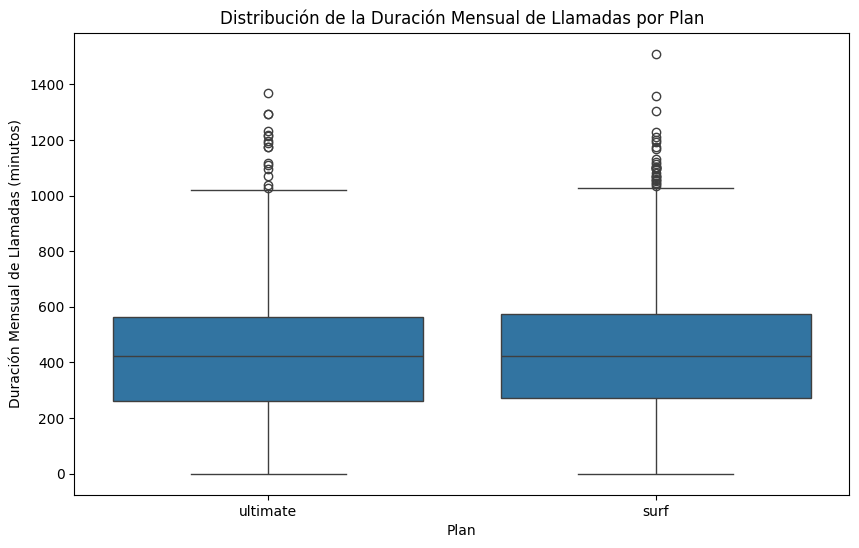

In [138]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Configurar el gráfico
plt.figure(figsize=(10,6))

# Diagrama de caja
sns.boxplot(data=user_activity, x='plan', y='minutes_used')

# Etiquetas
plt.xlabel("Plan")
plt.ylabel("Duración Mensual de Llamadas (minutos)")
plt.title("Distribución de la Duración Mensual de Llamadas por Plan")

# Mostrar gráfico
plt.show()


Ambos planes tienen una distribución de minutos utilizada muy similar.
Como la mayoría de los usuarios de Surf NO excede los 500 minutos incluidos en el plan, Megaline no genera ingresos adicionales significativos por llamadas en este plan.
Dado que Ultimate ofrece 3000 minutos, los usuarios de este plan claramente no necesitan pagar por minutos extra, sin embargo, algunos usuarios de Surf si exceden por mucho los 500 minutos incluidos en su plan, como se observa en el diagrama de caja.
En el histrograma se aprecia que la mayoría de los usuarios de Surf utilizan una cantidad de minutos dentro de un rango muy común. Tambien indica que hay más usuarios en el plan Surf que en Ultimate.


### Mensajes

,periodo,plan,messages_sent
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,surf,NaN
freq,1,12,NaN
mean,NaN,NaN,24.656000
std,NaN,NaN,9.049246
min,NaN,NaN,10.500000
25%,NaN,NaN,16.865217
50%,NaN,NaN,26.166013
75%,NaN,NaN,31.168455


,periodo,plan,messages_sent
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,ultimate,NaN
freq,1,12,NaN
mean,NaN,NaN,31.089497
std,NaN,NaN,9.346334
min,NaN,NaN,15.500000
25%,NaN,NaN,21.928571
50%,NaN,NaN,32.466978
75%,NaN,NaN,38.510730


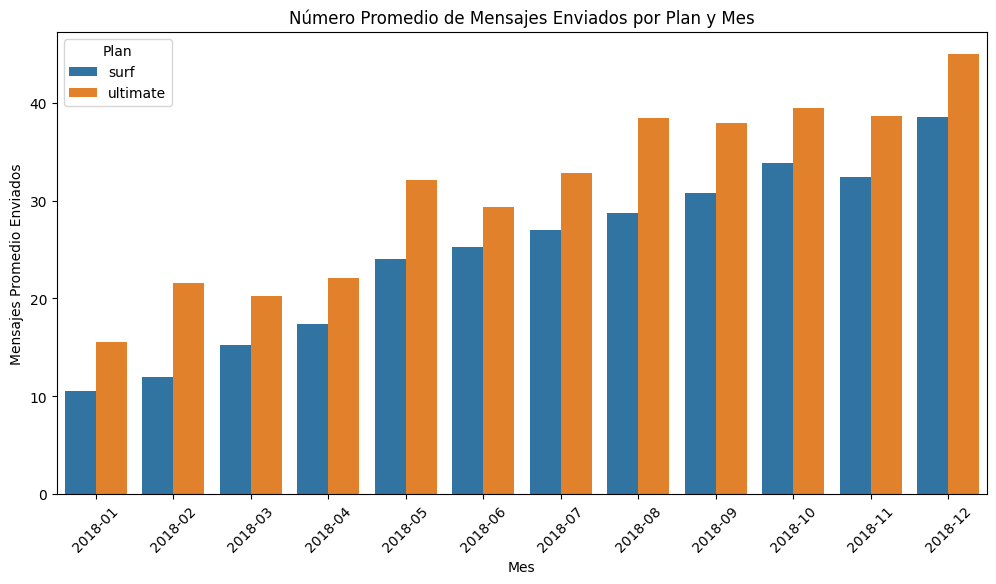

In [139]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

avg_messages = user_activity.groupby(['periodo', 'plan'])['messages_sent'].mean().reset_index()
display(avg_messages[avg_messages['plan']=='surf'].describe(include='all'))
display(avg_messages[avg_messages['plan']=='ultimate'].describe(include='all'))

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(data=avg_messages, x='periodo', y='messages_sent', hue='plan')

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Mensajes Promedio Enviados")
plt.title("Número Promedio de Mensajes Enviados por Plan y Mes")
plt.xticks(rotation=45)
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()



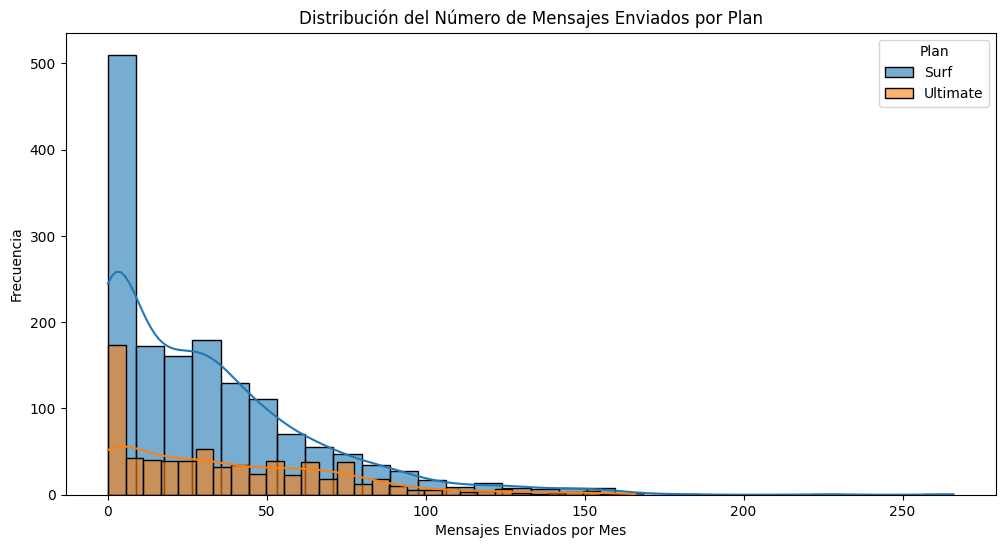

In [140]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Configurar el gráfico
plt.figure(figsize=(12,6))

# Graficar histogramas para cada plan
sns.histplot(user_activity[user_activity['plan'] == 'surf']['messages_sent'], bins=30, kde=True, label="Surf", alpha=0.6)
sns.histplot(user_activity[user_activity['plan'] == 'ultimate']['messages_sent'], bins=30, kde=True, label="Ultimate", alpha=0.6)

# Etiquetas
plt.xlabel("Mensajes Enviados por Mes")
plt.ylabel("Frecuencia")
plt.title("Distribución del Número de Mensajes Enviados por Plan")
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()



In [141]:
# Calcular estadísticas descriptivas por plan
messages_stats = user_activity.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()

# Mostrar estadísticas
display(messages_stats)

,plan,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


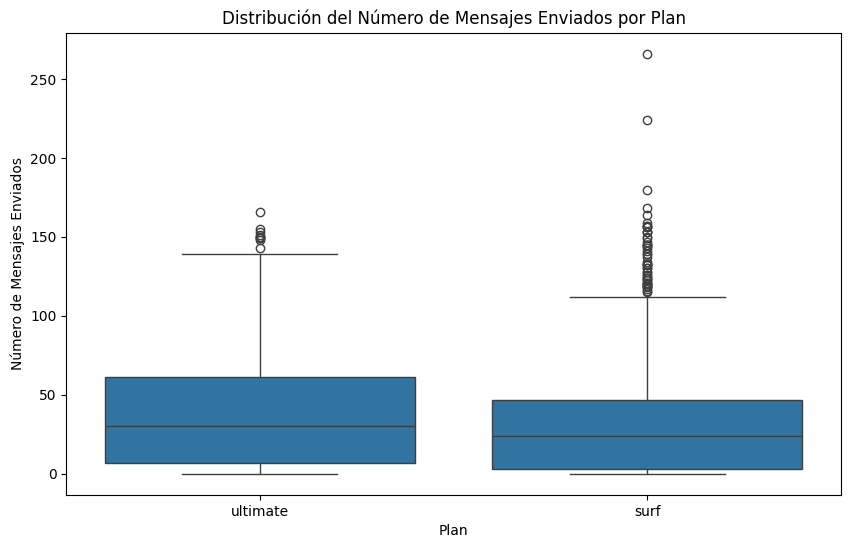

In [142]:
# Configurar el gráfico
plt.figure(figsize=(10,6))

# Diagrama de caja
sns.boxplot(data=user_activity, x='plan', y='messages_sent')

# Etiquetas
plt.xlabel("Plan")
plt.ylabel("Número de Mensajes Enviados")
plt.title("Distribución del Número de Mensajes Enviados por Plan")

# Mostrar gráfico
plt.show()

Los usuarios de Ultimate envían más mensajes en promedio.
Ambos valores son menores a los límites incluidos en sus respectivos planes, Surf incluye 50 SMS y envían 25 aprox. en promedio. Ultimate incluye 1000 SMS y envían 31 aprox. en promedio.
Los usuarios de ambos planes rara vez superan el límite de mensajes incluidos, lo que significa que los ingresos adicionales por mensajes son insignificantes.
En el histrograma se aprecia que son más del doble de los usuarios de Surf que no envían mensajes que los usuarios de Ultimate.
Dado que Ultimate ofrece 1000 mensajes, los usuarios de este plan claramente no necesitan pagar por mensajes extra, sin embargo, muchos usuarios de Surf si exceden por mucho los 50 mensajes incluidos en su plan, de Q3 a Q3 + 1.5 y más los usuarios se exceden de 50 mensajes, como se observa en el diagrama de caja, quiza se les podría ofrecer cambiar al otro plan.

### Internet

,periodo,plan,gb_used
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,surf,NaN
freq,1,12,NaN
mean,NaN,NaN,14.594808
std,NaN,NaN,3.628348
min,NaN,NaN,5.000000
25%,NaN,NaN,13.229469
50%,NaN,NaN,15.957816
75%,NaN,NaN,16.877704


,periodo,plan,gb_used
count,12,12,12.000000
unique,12,1,NaN
top,2018-01,ultimate,NaN
freq,1,12,NaN
mean,NaN,NaN,16.346165
std,NaN,NaN,2.991152
min,NaN,NaN,7.250000
25%,NaN,NaN,16.451977
50%,NaN,NaN,17.064869
75%,NaN,NaN,17.749003


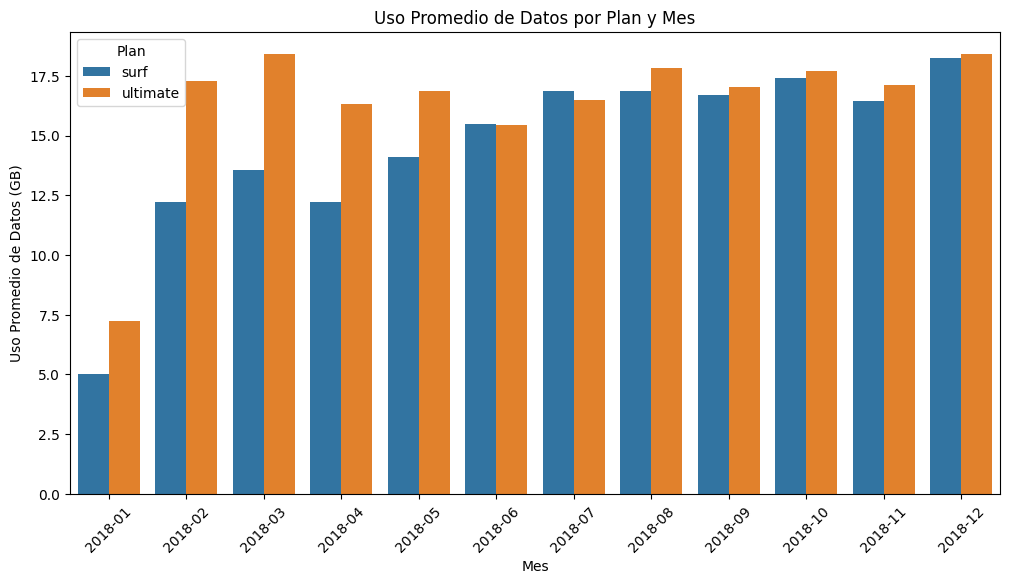

In [143]:
# Calcular la cantidad promedio de GB usados por plan y mes
avg_gb = user_activity.groupby(['periodo', 'plan'])['gb_used'].mean().reset_index()
display(avg_gb[avg_gb['plan']=='surf'].describe(include='all'))
display(avg_gb[avg_gb['plan']=='ultimate'].describe(include='all'))
# Graficar
plt.figure(figsize=(12,6))
sns.barplot(data=avg_gb, x='periodo', y='gb_used', hue='plan')

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Uso Promedio de Datos (GB)")
plt.title("Uso Promedio de Datos por Plan y Mes")
plt.xticks(rotation=45)
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()


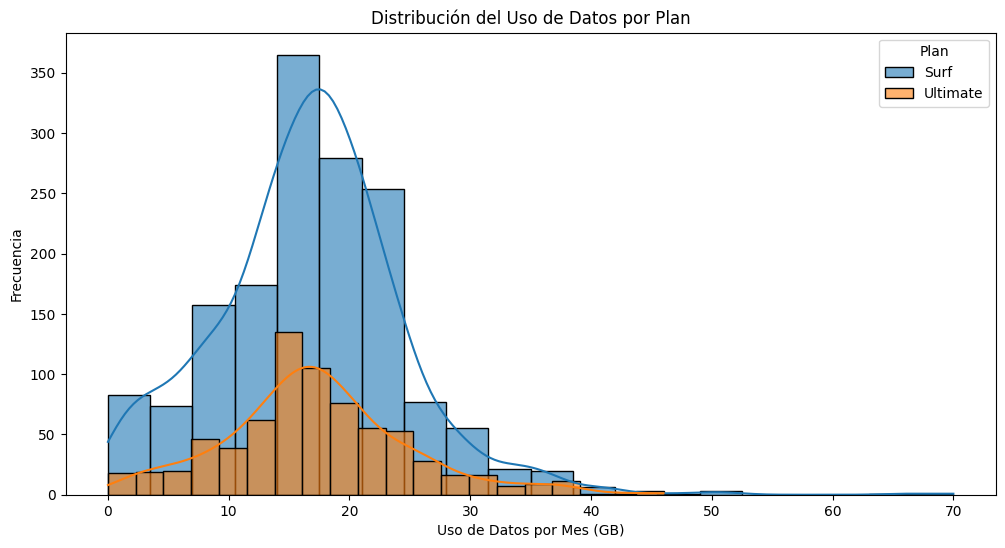

In [144]:
# Configurar el gráfico
plt.figure(figsize=(12,6))

# Graficar histogramas para cada plan
sns.histplot(user_activity[user_activity['plan'] == 'surf']['gb_used'], bins=20, kde=True, label="Surf", alpha=0.6)
sns.histplot(user_activity[user_activity['plan'] == 'ultimate']['gb_used'], bins=20, kde=True, label="Ultimate", alpha=0.6)

# Etiquetas
plt.xlabel("Uso de Datos por Mes (GB)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Uso de Datos por Plan")
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()


In [145]:
# Calcular estadísticas descriptivas por plan
gb_stats = user_activity.groupby('plan')['gb_used'].agg(['mean', 'var']).reset_index()

# Mostrar estadísticas
display(gb_stats)


,plan,mean,var
0,surf,16.670693,61.58360
1,ultimate,17.306944,58.83055


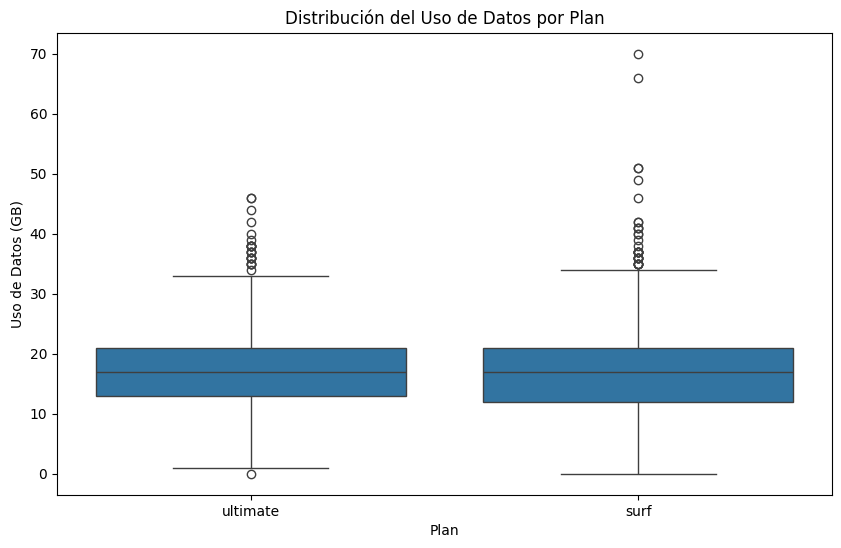

In [146]:
# Configurar el gráfico
plt.figure(figsize=(10,6))

# Diagrama de caja
sns.boxplot(data=user_activity, x='plan', y='gb_used')

# Etiquetas
plt.xlabel("Plan")
plt.ylabel("Uso de Datos (GB)")
plt.title("Distribución del Uso de Datos por Plan")

# Mostrar gráfico
plt.show()


Los usuarios de Ultimate consumen más datos en promedio (17.31 GB) que los de Surf (16.67 GB). Sin embargo, límite del plan Surf es de 15 GB, lo que significa que muchos usuarios lo están superando y generando ingresos adicionales para Megaline.
La varianza en Surf es un poco mayor (61.58 vs. 58.83), lo que indica que hay más variabilidad en el consumo de datos en este plan.
Los usuarios de Ultimate tienen un consumo más uniforme, mientras que en Surf hay usuarios que usan significativamente más datos que otros.
El diagrama de caja de ambos planes es muy similar, lo que confirma que el consumo de datos es comparable en ambos, sin embargo, Surf tiene dos puntos atípicos cerca de 70 GB, lo que indica que hay algunos usuarios con un consumo extremadamente alto y Ultimate tiene un outlier en 0 GB, lo que sugiere que hay al menos un usuario que no usó datos móviles en algún mes.


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [147]:
# Calcular estadísticas descriptivas de los ingresos por plan
revenue_stats = user_activity.groupby('plan')['total_revenue'].agg([
    'count',  # Número de usuarios en cada plan
    'mean',   # Media de ingresos
    'std',    # Desviación estándar
    'min',    # Mínimo
    ('q1', lambda x: x.quantile(0.25)),  # Cuartil 25%
    ('median', lambda x: x.quantile(0.50)),  # Mediana (Cuartil 50%)
    ('q3', lambda x: x.quantile(0.75)),  # Cuartil 75%
    'max',    # Máximo
    'var'     # Varianza
]).reset_index()

# Mostrar resultados
display(revenue_stats)


,plan,count,mean,std,min,q1,median,q3,max,var
0,surf,1573,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37,3067.835152
1,ultimate,720,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00,129.848486


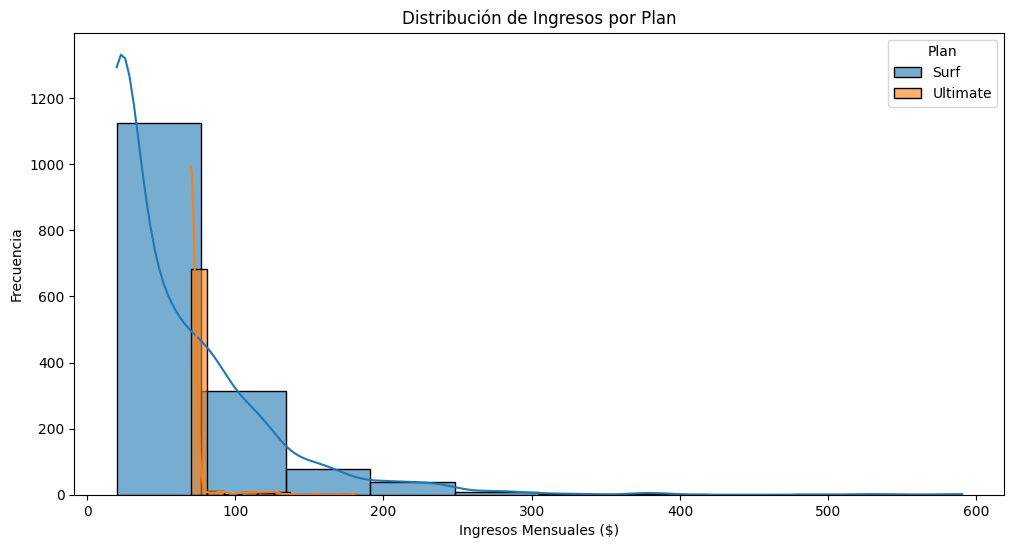

In [148]:
# Configurar la figura
plt.figure(figsize=(12,6))

# Histograma de ingresos por plan
sns.histplot(user_activity[user_activity['plan'] == 'surf']['total_revenue'], bins=10, kde=True, label="Surf", alpha=0.6)
sns.histplot(user_activity[user_activity['plan'] == 'ultimate']['total_revenue'], bins=10, kde=True, label="Ultimate", alpha=0.6)

# Etiquetas
plt.xlabel("Ingresos Mensuales ($)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Ingresos por Plan")
plt.legend(title="Plan")

# Mostrar gráfico
plt.show()


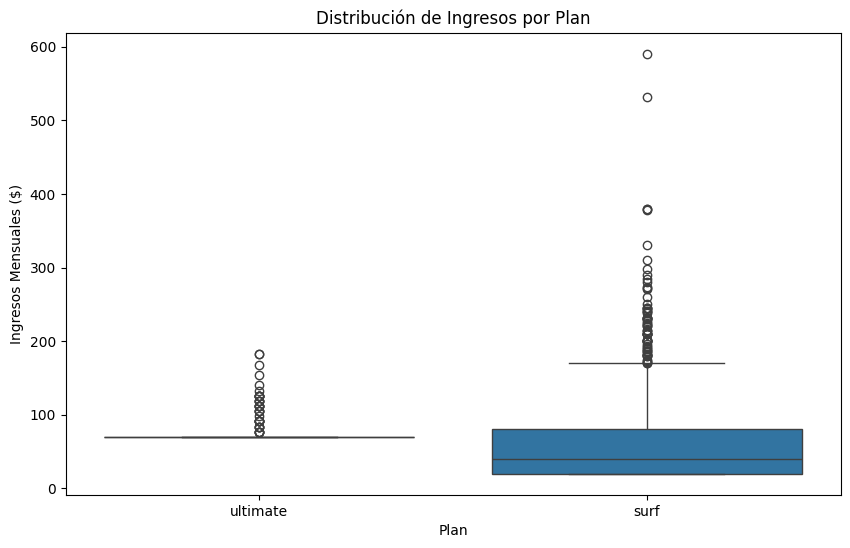

In [149]:
# Configurar la figura
plt.figure(figsize=(10,6))

# Diagrama de caja de ingresos por plan
sns.boxplot(data=user_activity, x='plan', y='total_revenue')

# Etiquetas
plt.xlabel("Plan")
plt.ylabel("Ingresos Mensuales ($)")
plt.title("Distribución de Ingresos por Plan")

# Mostrar gráfico
plt.show()


En términos individuales, cada usuario de Ultimate genera más ingresos que los de Surf.
Pero Surf tiene más del doble de usuarios, por lo que su impacto total en ingresos podría ser mayor.
Los ingresos en Surf tienen una variabilidad enorme (std = $55.39), lo que indica que algunos usuarios pagan mucho más que otros.
En Ultimate, los ingresos son muy uniformes (std = $11.40), lo que significa que casi todos pagan lo mismo.
La varianza en Surf (3,067.84) es mucho mayor que en Ultimate (129.85), lo que confirma que hay una gran diferencia en cuánto paga cada usuario de Surf.
Surf es el plan que más ingresos puede generar en usuarios que exceden su uso de datos.
Ultimate, en cambio, es muy estable, pero no tiene la misma oportunidad de generar ingresos adicionales.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

H0: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales.

Ha: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.

Alpha: 5%

In [150]:
# Prueba las hipótesis
from scipy.stats import ttest_ind

# Extraer ingresos por usuario en cada plan
revenues_surf = user_activity[user_activity['plan'] == 'surf']['total_revenue']
revenues_ultimate = user_activity[user_activity['plan'] == 'ultimate']['total_revenue']

# Prueba t de Student para dos muestras independientes
t_stat, p_value = ttest_ind(revenues_surf, revenues_ultimate, equal_var=False)  # Usamos equal_var=False porque las varianzas son diferentes

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value}")

# Interpretación de la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio entre Surf y Ultimate son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos promedio sean diferentes.")



Estadístico t: -7.9521
Valor p: 3.170390548113574e-15
Rechazamos la hipótesis nula: los ingresos promedio entre Surf y Ultimate son significativamente diferentes.


Dado que estamos comparando las medias de dos grupos independientes (usuarios de Surf vs. usuarios de Ultimate), utilicé una prueba t de Student para dos muestras independientes.

El valor t (-7.9521) es muy negativo, lo que indica que la media de ingresos en Surf es significativamente menor que la de Ultimate. Cuanto más grande (en magnitud) es el valor absoluto de t, mayor es la diferencia entre los grupos.

El valor p es 3.17 × 10⁻¹⁵, un número extremadamente pequeño.
Como p < 0.05, rechazamos la hipótesis nula (H0H0​), lo que significa que hay una diferencia estadísticamente significativa entre los ingresos promedio de los planes Surf y Ultimate.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

HO = El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

Ha = El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Alpha = 5%

In [151]:
# Añadir la columna 'city' desde la tabla users a user_activity
user_activity = user_activity.merge(users[['user_id', 'city']], on='user_id', how='left')

print(user_activity.head())


   user_id  periodo  calls_made  minutes_used  messages_sent  gb_used  \
0     1000  2018-12          16           124             11        2   
1     1001  2018-08          27           182             30        7   
2     1001  2018-09          49           315             44       14   
3     1001  2018-10          65           393             53       22   
4     1001  2018-11          64           426             36       19   

       plan  messages_included  mb_per_month_included  minutes_included  ...  \
0  ultimate               1000                  30720              3000  ...   
1      surf                 50                  15360               500  ...   
2      surf                 50                  15360               500  ...   
3      surf                 50                  15360               500  ...   
4      surf                 50                  15360               500  ...   

   usd_per_message  usd_per_minute  extra_minutes  extra_messages  extra_gb  \
0

In [152]:
# Prueba las hipótesis

from scipy.stats import ttest_ind

# Filtrar usuarios del área NY-NJ
ny_nj_users = user_activity[user_activity['city'].str.contains("NY-NJ", na=False)]

# Filtrar usuarios de otras regiones
other_users = user_activity[~user_activity['city'].str.contains("NY-NJ", na=False)]

# Extraer ingresos de ambos grupos
revenues_ny_nj = ny_nj_users['total_revenue']
revenues_other = other_users['total_revenue']

# Prueba t de Student para dos muestras independientes
t_stat, p_value = ttest_ind(revenues_ny_nj, revenues_other, equal_var=False)  # equal_var=False porque las varianzas pueden ser diferentes

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación de la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio entre NY-NJ y otras regiones son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos promedio sean diferentes.")


Estadístico t: -2.1309
Valor p: 0.0335
Rechazamos la hipótesis nula: los ingresos promedio entre NY-NJ y otras regiones son significativamente diferentes.


Dado que estamos comparando las medias de dos grupos independientes (usuarios de NY-NJ vs. usuarios de otras regiones), usé una prueba t de Student para dos muestras independientes.

El valor t (-2.1309) es negativo, lo que sugiere que los ingresos en NY-NJ son menores que en otras regiones.
Un valor absoluto más alto de t indica una diferencia más fuerte entre los grupos, y aunque este valor no es extremadamente alto, es lo suficientemente grande para rechazar H0.

El valor p es 0.0335, menor que el nivel de significancia de 0.05 (α=0.05α=0.05).
Como p<0.05p<0.05, rechazamos la hipótesis nula (H0H0​), lo que significa que existe una diferencia estadísticamente significativa entre los ingresos promedio de los usuarios de NY-NJ y los de otras regiones.

## Conclusión general

Si no hubieramos hecho la prueba t de student pareciera que el plan Surf es más rentable, sin embargo, después de realizar la prueba, Ultimate es más rentable en promedio:

Cada usuario de Ultimate paga más de manera constante ($72.31 en promedio), ya que el precio base es alto y hay poca variabilidad.
El precio base alto de Ultimate garantiza ingresos estables.

Surf es más variable y genera ingresos extra en algunos casos, pero no en todos:

Aunque algunos usuarios pagan mucho más en Surf (hasta $590), muchos otros solo pagan el precio mínimo ($20).
La dispersión de ingresos en Surf indica que solo algunos usuarios generan ingresos adicionales, mientras que en Ultimate casi todos pagan $70 fijos.